## Student Performance Factors

Dataset from Kaggle -> https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

### Research Questions
Which factors influence student performance the most, and how can we predict a student’s performance based on these factors?

### Metholodgy

#### Data Exploration with Pandas:
* Visualize the data (scatter plots, histograms, heatmaps).
* Investigate the correlation of the values with the exam_grade.

#### Building a Prediction Model:
* Data Preprocessing: Feature scaling, one-hot encoding of categorical variables.
* Model Training: Use simple models like a neural network (PyTorch) to predict student performance (grades or classes).
* Evaluation: Measure accuracy.

#### Interpret the Results:
* Identify the most important factors influencing performance.
* Derive actionable recommendations (e.g., support programs based on the results or other datasets to enhance the model).

### Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

### Load the Dataset

In [7]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 1 Visualisation

In [3]:
# Check for missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
# Describe the data
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
# overview over the data structure
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(None,
    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
 0             23          84                  Low                High   
 1             19          64                  Low              Medium   
 2             24          98               Medium              Medium   
 3             29          89                  Low              Medium   
 4             19          92               Medium              Medium   
 
   Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
 0                         No            7               73              Low   
 1                         No            8               59              Low   
 2                        Yes            7               91           Medium   
 3                        Yes            8               98           Medium   
 4                        Yes            6               65           Medium   
 
   Internet_Access  Tutoring_Sessions Family_Income Teacher_Quali

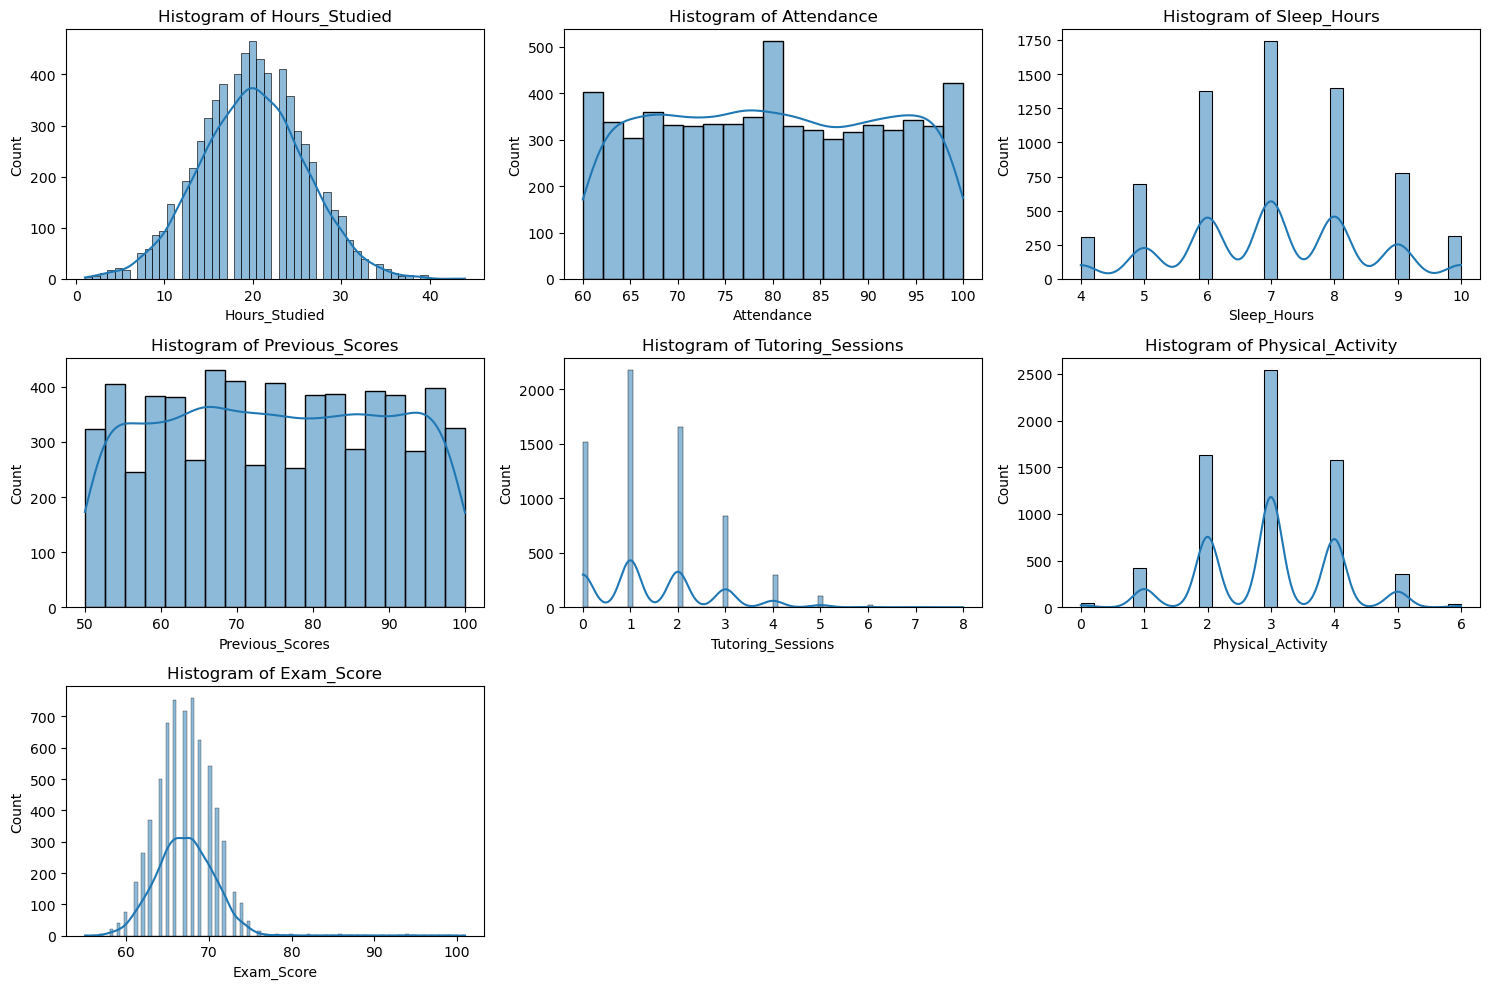

In [6]:
# select only numeric columns
numerical_columns = df.select_dtypes(include='number').columns

# visualisation of the numeric data with histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## 2. Statistics - Correlations

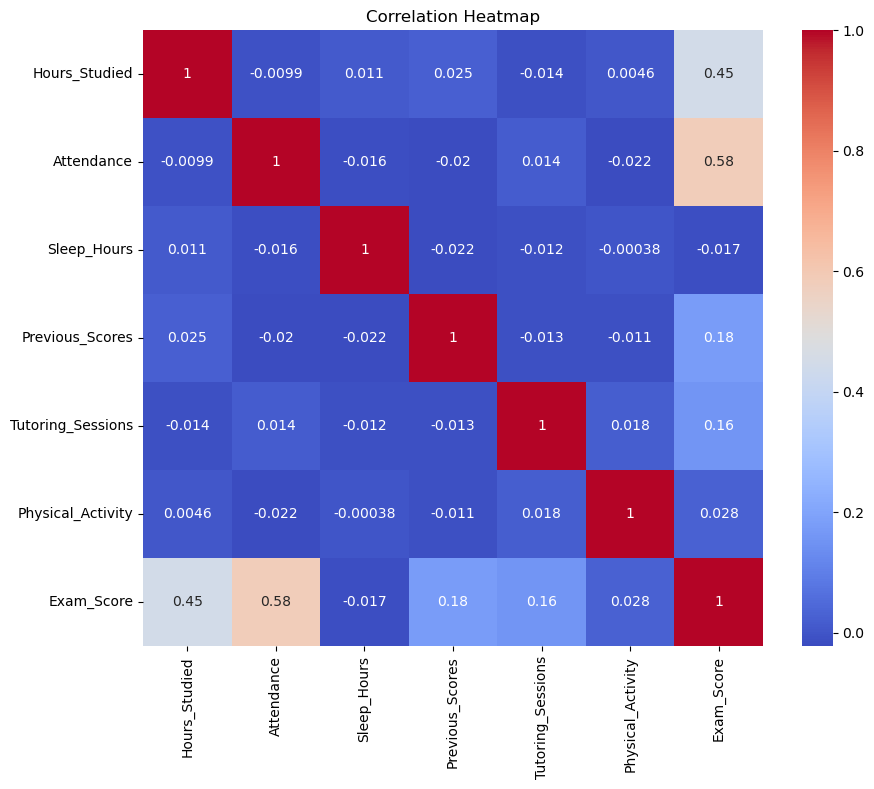

In [7]:
# select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# calculate correlation and display as Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
correlation = df['Exam_Score'].corr(df['Attendance'])
print(f'Korrelation zwischen exam_score und attendance: {correlation:.2f}')

Korrelation zwischen exam_score und attendance: 0.58


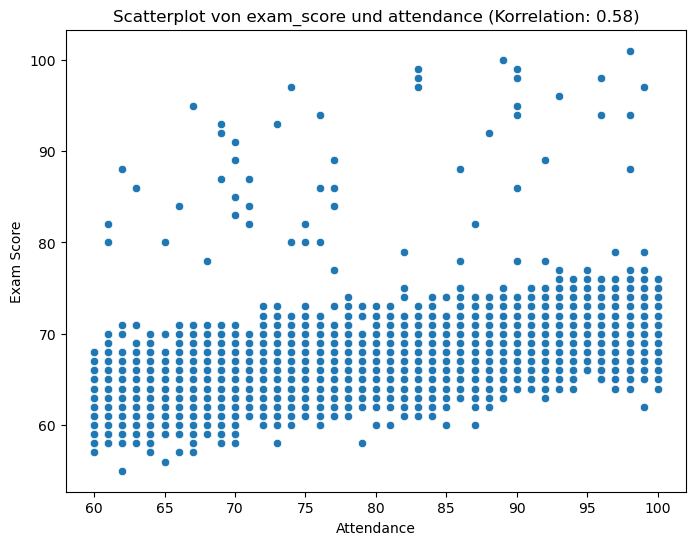

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
plt.title(f'Scatterplot von exam_score und attendance (Korrelation: {correlation:.2f})')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

In [10]:
correlation = df['Exam_Score'].corr(df['Hours_Studied'])
print(f'Korrelation zwischen exam_score und hours_studied: {correlation:.2f}')

Korrelation zwischen exam_score und hours_studied: 0.45


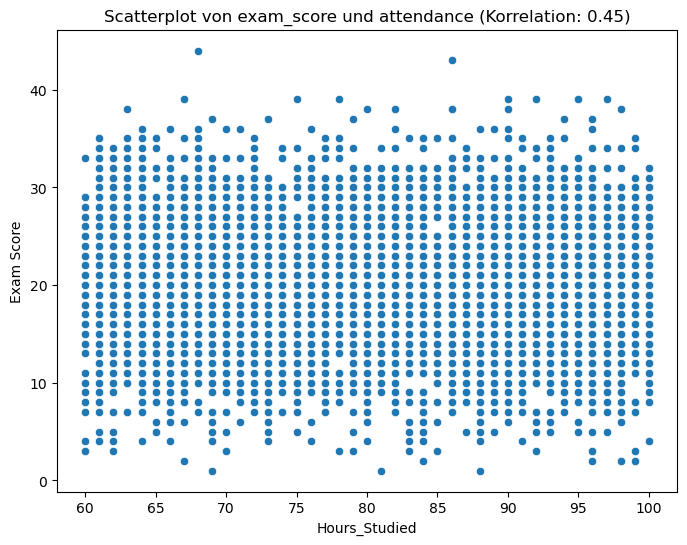

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Hours_Studied', data=df)
plt.title(f'Scatterplot von exam_score und attendance (Korrelation: {correlation:.2f})')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam Score')
plt.show()

In [12]:
# Copy of the dataset, to do changes
encoded_data = df.copy()

# custom coding order
custom_encodings = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Extracurricular_Activities': ['No', 'Yes'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Internet_Access': ['No', 'Yes'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'School_Type': ['Public', 'Private'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Learning_Disabilities': ['No', 'Yes'],
    'Parental_Education_Level': ['College', 'High School', 'Postgradute'],
    'Distance_from_Home': ['Far', 'Moderate', 'Near'],
    'Gender': ['Female', 'Male'],
}

# dictionary, to capture the coding table
encoding_tables = {}

for col, order in custom_encodings.items():
    encoded_data[col] = pd.Categorical(encoded_data[col], categories=order, ordered=True).codes
    encoding_tables[col] = pd.DataFrame({
        'Original Category': order,
        'Encoded Value': range(len(order))
    })

encoding_tables

{'Parental_Involvement':   Original Category  Encoded Value
 0               Low              0
 1            Medium              1
 2              High              2,
 'Access_to_Resources':   Original Category  Encoded Value
 0               Low              0
 1            Medium              1
 2              High              2,
 'Extracurricular_Activities':   Original Category  Encoded Value
 0                No              0
 1               Yes              1,
 'Motivation_Level':   Original Category  Encoded Value
 0               Low              0
 1            Medium              1
 2              High              2,
 'Internet_Access':   Original Category  Encoded Value
 0                No              0
 1               Yes              1,
 'Family_Income':   Original Category  Encoded Value
 0               Low              0
 1            Medium              1
 2              High              2,
 'Teacher_Quality':   Original Category  Encoded Value
 0            

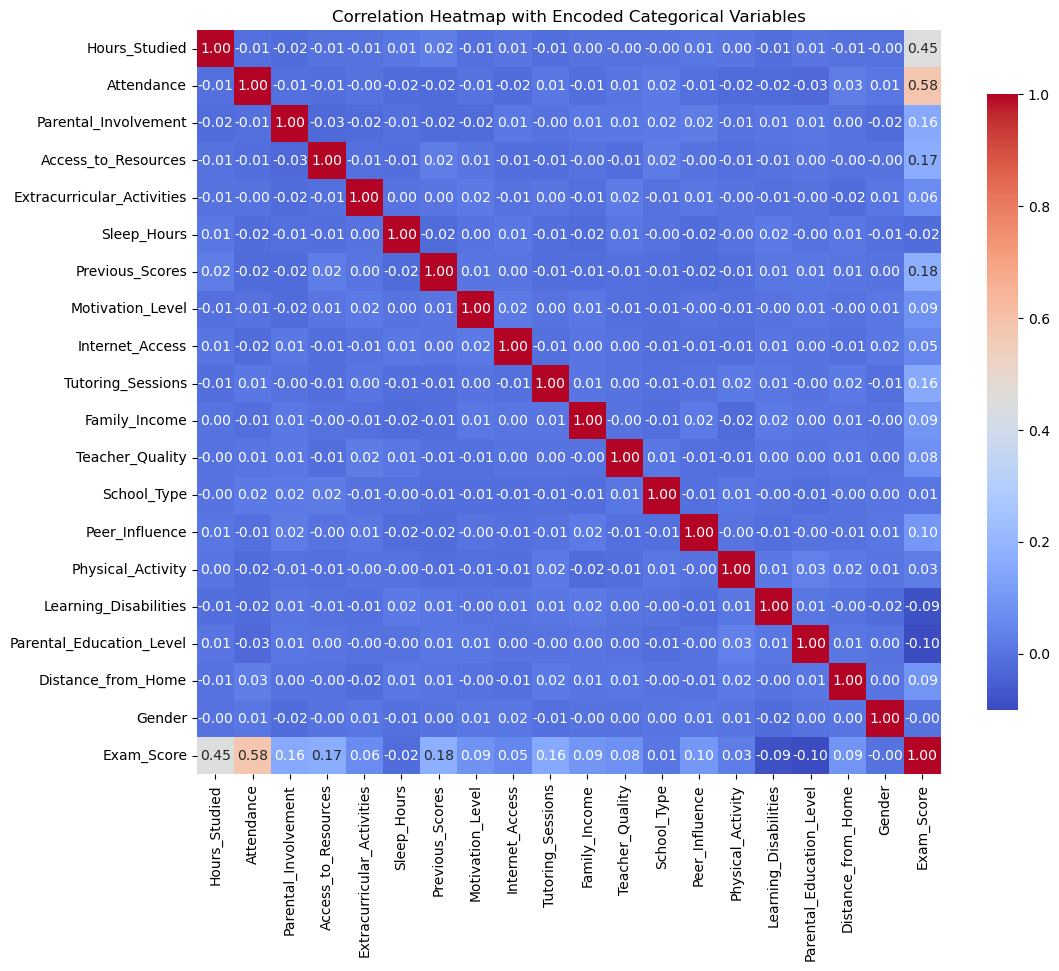

In [13]:
# correlation matrix after the coding
encoded_correlation_matrix = encoded_data.corr()

# plot of the new heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap with Encoded Categorical Variables')
plt.show()

## 3. AutoGluon - AutoML and predictor
https://auto.gluon.ai/dev/api/autogluon.tabular.models.html

In [5]:
import torch
print("GPU verfügbar:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Anzahl verfügbarer GPUs:", torch.cuda.device_count())


GPU verfügbar: True
CUDA Version: 12.4
Anzahl verfügbarer GPUs: 1


In [8]:
from sklearn.model_selection import train_test_split

# create the train and data set
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print('Train Data:')
print(train_data.head())

print('Test Data:')
print(test_data.head())

Train Data:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
5810             27          79                  Low                High   
1268             16          86                 High              Medium   
414              22          87                  Low              Medium   
4745             18         100                 High              Medium   
654              35          78                 High                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5810                        Yes            8               63   
1268                        Yes            7               94   
414                          No            8               83   
4745                        Yes           10               86   
654                         Yes           10               99   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
5810             High             Yes                  2          

In [22]:
from autogluon.tabular import TabularPredictor

# Set the target variable
target_column = 'Exam_Score'

# Initialize TabularPredictor and start training with time limit and GPU settings
predictor = TabularPredictor(label=target_column).fit(
    train_data, 
    presets='best_quality', 
    time_limit=4 * 3600,  # Set time limit to 4 hours (4 * 3600 seconds)
    ag_args_fit={'num_gpus': 1}  # Enable GPU usage if available
)

No path specified. Models will be saved in: "AutogluonModels\ag-20241108_105806"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       1.64 GB / 5.94 GB (27.7%)
Disk Space Avail:   113.26 GB / 475.83 GB (23.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

In [23]:
#leaderboard anzeigen über predictor
print(predictor.leaderboard())

                      model  score_val eval_metric  pred_time_val  \
0            XGBoost_BAG_L2   0.864818    accuracy      66.099134   
1       WeightedEnsemble_L3   0.864818    accuracy      66.114765   
2           LightGBM_BAG_L2   0.864436    accuracy      67.735417   
3           CatBoost_BAG_L2   0.861759    accuracy      65.771420   
4         LightGBMXT_BAG_L2   0.860612    accuracy      69.500003   
5   RandomForestGini_BAG_L2   0.859465    accuracy      67.210702   
6   RandomForestEntr_BAG_L2   0.855641    accuracy      66.737106   
7     ExtraTreesGini_BAG_L2   0.848948    accuracy      67.209356   
8     ExtraTreesEntr_BAG_L2   0.845698    accuracy      67.007568   
9       WeightedEnsemble_L2   0.837859    accuracy       2.348980   
10   NeuralNetFastAI_BAG_L2   0.832505    accuracy      65.993535   
11    NeuralNetTorch_BAG_L1   0.831549    accuracy       0.338187   
12   NeuralNetFastAI_BAG_L1   0.784321    accuracy       0.735853   
13        LightGBMXT_BAG_L1   0.34

In [25]:
# show feature importance
importance_df = predictor.feature_importance(test_data)
importance_df

Computing feature importance via permutation shuffling for 19 features using 1311 rows with 5 shuffle sets...
	3473.63s	= Expected runtime (694.73s per shuffle set)
	1355.9s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Attendance,0.745538,0.011651,7.154511e-09,5,0.769527,0.721549
Hours_Studied,0.711823,0.004295,1.589936e-10,5,0.720666,0.702980
Previous_Scores,0.517773,0.013531,5.592577e-08,5,0.545634,0.489911
Access_to_Resources,0.501144,0.007336,5.509081e-09,5,0.516249,0.486039
Parental_Involvement,0.500076,0.008418,9.632876e-09,5,0.517410,0.482743
Tutoring_Sessions,0.452479,0.009848,2.691371e-08,5,0.472757,0.432201
Parental_Education_Level,0.304958,0.013660,4.817781e-07,5,0.333084,0.276832
Family_Income,0.301754,0.018208,1.583054e-06,5,0.339245,0.264264
Peer_Influence,0.298856,0.007061,3.737334e-08,5,0.313395,0.284316
Motivation_Level,0.286499,0.006304,2.810865e-08,5,0.299479,0.273519


C:\Users\michi\AppData\Local\Temp\ipykernel_9852\2464935195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["importance"], y=importance_df.index, palette="viridis")


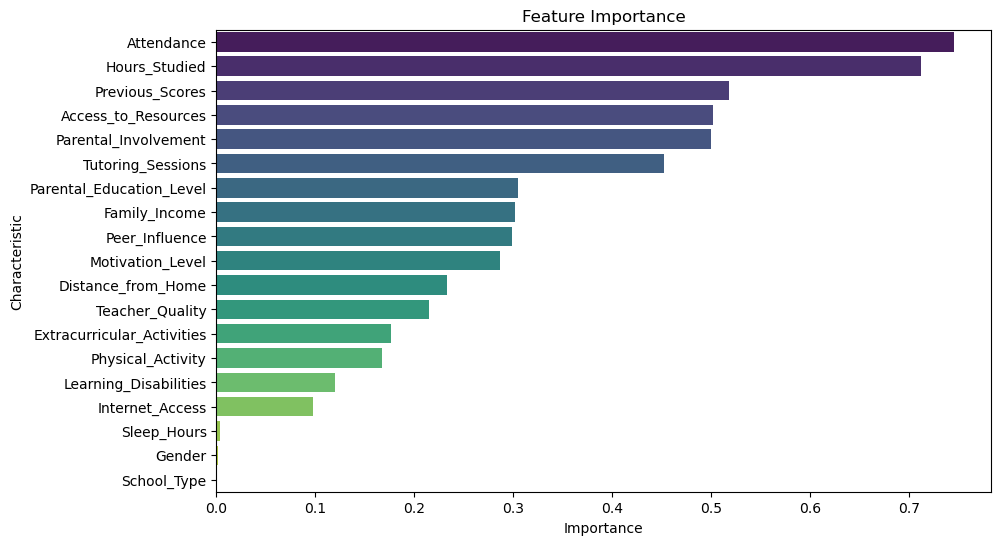

In [26]:
# sort by importance
importance_df = importance_df.sort_values(by="importance", ascending=False)

# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["importance"], y=importance_df.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Characteristic")
plt.show()

### Feature Importance Interpretation
The table shows that "Attendance" and "Hours_Studied" have the highest importance values, indicating they have the strongest impact on the model's predictions.

Moderately important features include "Previous_Scores", "Access_to_Resources", "Parental_Involvement", and "Tutoring_Sessions", which also contribute meaningfully but not as strongly as the top features.

On the other hand, features like "Sleep_Hours", "Gender", and "School_Type" have low or even slightly negative importance values, suggesting limited predictive power. 

### Predictions on the trained prediction models
Now we use the test_data and different models to predict exam_scores.

In [9]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor.load(path=r"AutogluonModels\ag-20241108_105806")

In [15]:
# show test_data to see exact scores
print(test_data)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
743              20          71               Medium                 Low   
5551             22          71               Medium                 Low   
3442             21          91                 High              Medium   
6571             12          91               Medium                 Low   
4204             21          63                  Low                High   
...             ...         ...                  ...                 ...   
4709             20          78                 High              Medium   
3664             27          90                 High                High   
5231             23          72                  Low              Medium   
1773             21          76                  Low              Medium   
5782             23          87                 High              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
743                   

In [16]:
# 0            XGBoost_BAG_L2   0.864818    accuracy      66.099134   
predictionsXGBoost = predictor.predict(data=test_data, model="XGBoost_BAG_L2")
print(predictionsXGBoost)

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    68
3664    72
5231    66
1773    64
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


In [17]:
# 1       WeightedEnsemble_L3   0.864818    accuracy      66.114765   
predictionsWeightedEnsemble = predictor.predict(data=test_data, model="WeightedEnsemble_L3")
print(predictionsXGBoost)

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    68
3664    72
5231    66
1773    64
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


In [18]:
# 2           LightGBM_BAG_L2   0.864436    accuracy      67.735417 
predictionsLightGBM = predictor.predict(data=test_data, model="LightGBM_BAG_L2")
print(predictionsXGBoost)

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    68
3664    72
5231    66
1773    64
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


In [19]:
# 10   NeuralNetFastAI_BAG_L2   0.832505    accuracy      65.993535   
predictionsNeuralNetFastAi = predictor.predict(data=test_data, model="NeuralNetFastAI_BAG_L2")
print(predictionsNeuralNetFastAi)

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    68
3664    72
5231    66
1773    63
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


In [20]:
# 11    NeuralNetTorch_BAG_L1   0.831549    accuracy       0.338187 
predictionsNeuralNetTorch = predictor.predict(data=test_data, model="NeuralNetTorch_BAG_L1")
print(predictionsNeuralNetTorch)

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    68
3664    72
5231    66
1773    64
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


### Now we compare those 5 models to see which one did better on the test_data

In [23]:
from sklearn.metrics import accuracy_score
import pandas as pd
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor.load(path=r"AutogluonModels\ag-20241108_105806")

# Zielspalte und Features aus Testdaten extrahieren
true_labels = test_data['Exam_Score']
test_data_features = test_data.drop(columns=['Exam_Score'])

# Angenommen, Sie haben fünf Prädiktoren (predictor1, predictor2, ... predictor5)
predictorsName = ['XGBoost_BAG_L2', 'WeightedEnsemble_L3', 'LightGBM_BAG_L2', 'NeuralNetFastAI_BAG_L2', 'NeuralNetTorch_BAG_L1']

# Ergebnisse speichern
results = {}
for i, predictorName in enumerate(predictorsName):
    predictions = predictor.predict(data=test_data_features, model=predictorName)
    accuracy = accuracy_score(true_labels, predictions)  # Berechnung der Genauigkeit
    results[f'Model_{i+1}'] = accuracy

# Ergebnisse in DataFrame umwandeln'
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)


     Model  Accuracy
0  Model_1  0.859304
1  Model_2  0.859304
2  Model_3  0.860061
3  Model_4  0.841906
4  Model_5  0.832829


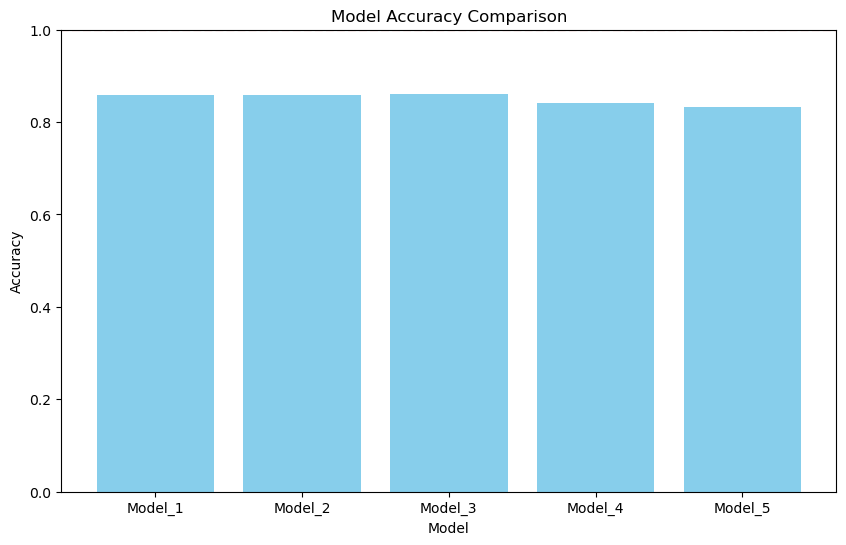

In [24]:
import matplotlib.pyplot as plt

# Balkendiagramm der Genauigkeit
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Begrenzung auf 100%, falls Accuracy in Dezimal
plt.axhline(y=1.0, color='r', linestyle='--')  # Linie für 100% Genauigkeit
plt.show()
